# Sexual Offenses In Puerto Rico May Be Happening Much More Than What Official Reports Say...
Let's take a look at the numbers provided by the Police Department of the island and compare it to the statistics of other ngos. There will also be interviews... 
First Source: https://policia.pr.gov/estadisticas-delitos-sexuales-y-maltrato-a-menores/

# Year 2017 

In [1]:
# Data is either on the website or in PDF format. Let's build a scraper using beautiful soup.
from bs4 import BeautifulSoup
import urllib3

http = urllib3.PoolManager()

url = 'https://policia.pr.gov/estadisticas-delitos-sexuales-y-maltrato-a-menores/'
response = http.request('GET', url)
soup = BeautifulSoup(response.data)

C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\User\AppData\Local\Programs\Python\Python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup

In [2]:
#response = requests.get("https://policia.pr.gov/estadisticas-delitos-sexuales-y-maltrato-a-menores/")
#doc = BeautifulSoup(response.text, 'html.parser')

In [3]:
for tr in soup.find_all('tr')[1:]:
    tds = tr.find_all('td')
    print (tds[0].text, tds[1].text, tds[2].text,tds[3].text,tds[4].text,tds[5].text,tds[6].text,tds[7].text, tds[8].text
           ,tds[9].text,tds[10].text,tds[11].text)

San Juan 122 34 7 115 28 0 15 1 0 1 15
Arecibo 78 74 14 64 6 0 5 18 0 1 1
Ponce 290 157 120 175 30 1 18 27 0 3 17
Humacao 41 25 4 37 7 0 5 12 0 0 0
Mayagüez 60 10 10 52 9 0 6 4 0 0 0
Caguas 81 12 18 63 0 0 3 5 0 0 0
Bayamón 145 81 27 118 10 0 9 19 0 5 14
Carolina 148 112 41 107 8 0 6 14 0 1 0
Guayama 79 14 14 65 22 0 10 7 0 1 4
Aguadilla 71 15 8 63 9 0 8 6 0 3 5
Utuado 60 60 23 48 8 1 6 2 0 2 2
Fajardo 49 39 9 40 2 0 2 5 0 0 0
Aibonito 39 23 4 35 8 0 7 3 0 0 0
Vega Baja 122 23 25 97 8 0 8 5 0 3 3
TOTAL 1385 679 324 1079 155 2 108 128 0 20 61


In [4]:
headers= soup.find_all('thead')[:]
for heads in headers:
        info = heads
        print(info.text)



ÁreaQuerellas RecibidasQuerellas EsclarecidasVíctima HombresVíctimas Mujeres Cantidad de ArrestosMás de Un  ArrestoRadicacíon de Cargos CriminalesIntervención con MenorMás de un Menor IntervenidoRadicación de FaltasCantidad de Convicción




In [5]:
import pandas as pd
data = pd.read_csv('offenses.txt', sep=",", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,San Juan,122,34,7,115,28,0,15,1,0,1,15
1,Arecibo,78,74,14,64,6,0,5,18,0,1,1
2,Ponce,290,157,120,175,30,1,18,27,0,3,17
3,Humacao,41,25,4,37,7,0,5,12,0,0,0
4,Mayagüez,60,10,10,52,9,0,6,4,0,0,0
5,Caguas,81,12,18,63,0,0,3,5,0,0,0
6,Bayamón,145,81,27,118,10,0,9,19,0,5,14
7,Carolina,148,112,41,107,8,0,6,14,0,1,0
8,Guayama,79,14,14,65,22,0,10,7,0,1,4
9,Aguadilla,71,15,8,63,9,0,8,6,0,3,5


In [6]:
data.columns = ['Área', 'Querellas Recibidas', 'Querellas Esclarecidas', 'Víctima Hombres', 'Víctimas Mujeres', 
                'Cantidad de Arrestos', 'Más de Un  Arresto', 'Radicacíon de Cargos Criminales', 
                'Intervención con Menor', 'Más de un Menor Intervenido', 'Radicación de Faltas', 
                'Cantidad de Convicción']

In [7]:
df=pd.DataFrame(data)
df.to_csv('sexual_offensesPR2017',index=False)

In [8]:
df

,Área,Querellas Recibidas,Querellas Esclarecidas,Víctima Hombres,Víctimas Mujeres,Cantidad de Arrestos,Más de Un Arresto,Radicacíon de Cargos Criminales,Intervención con Menor,Más de un Menor Intervenido,Radicación de Faltas,Cantidad de Convicción
0,San Juan,122,34,7,115,28,0,15,1,0,1,15
1,Arecibo,78,74,14,64,6,0,5,18,0,1,1
2,Ponce,290,157,120,175,30,1,18,27,0,3,17
3,Humacao,41,25,4,37,7,0,5,12,0,0,0
4,Mayagüez,60,10,10,52,9,0,6,4,0,0,0
5,Caguas,81,12,18,63,0,0,3,5,0,0,0
6,Bayamón,145,81,27,118,10,0,9,19,0,5,14
7,Carolina,148,112,41,107,8,0,6,14,0,1,0
8,Guayama,79,14,14,65,22,0,10,7,0,1,4
9,Aguadilla,71,15,8,63,9,0,8,6,0,3,5


In [9]:
import re
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline
import seaborn as sns

In [10]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['chartreuse','mediumseagreen','mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        'mediumspringgreen','seagreen']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

In [11]:
df.columns

Index(['Área', 'Querellas Recibidas', 'Querellas Esclarecidas',
       'Víctima Hombres', 'Víctimas Mujeres', 'Cantidad de Arrestos',
       'Más de Un  Arresto', 'Radicacíon de Cargos Criminales',
       'Intervención con Menor', 'Más de un Menor Intervenido',
       'Radicación de Faltas', 'Cantidad de Convicción'],
      dtype='object')

In [12]:
#As we can see this data does not record the date of the events. Lets work with what we have for now...
df['Querellas Recibidas'][0:14]


0     122
1      78
2     290
3      41
4      60
5      81
6     145
7     148
8      79
9      71
10     60
11     49
12     39
13    122
Name: Querellas Recibidas, dtype: int64

In [13]:
df1 = df[['Área','Querellas Recibidas','Querellas Esclarecidas']][0:14].sort_values(by='Querellas Recibidas',ascending=False)[0:14]
df1

,Área,Querellas Recibidas,Querellas Esclarecidas
2,Ponce,290,157
7,Carolina,148,112
6,Bayamón,145,81
0,San Juan,122,34
13,Vega Baja,122,23
5,Caguas,81,12
8,Guayama,79,14
1,Arecibo,78,74
9,Aguadilla,71,15
4,Mayagüez,60,10


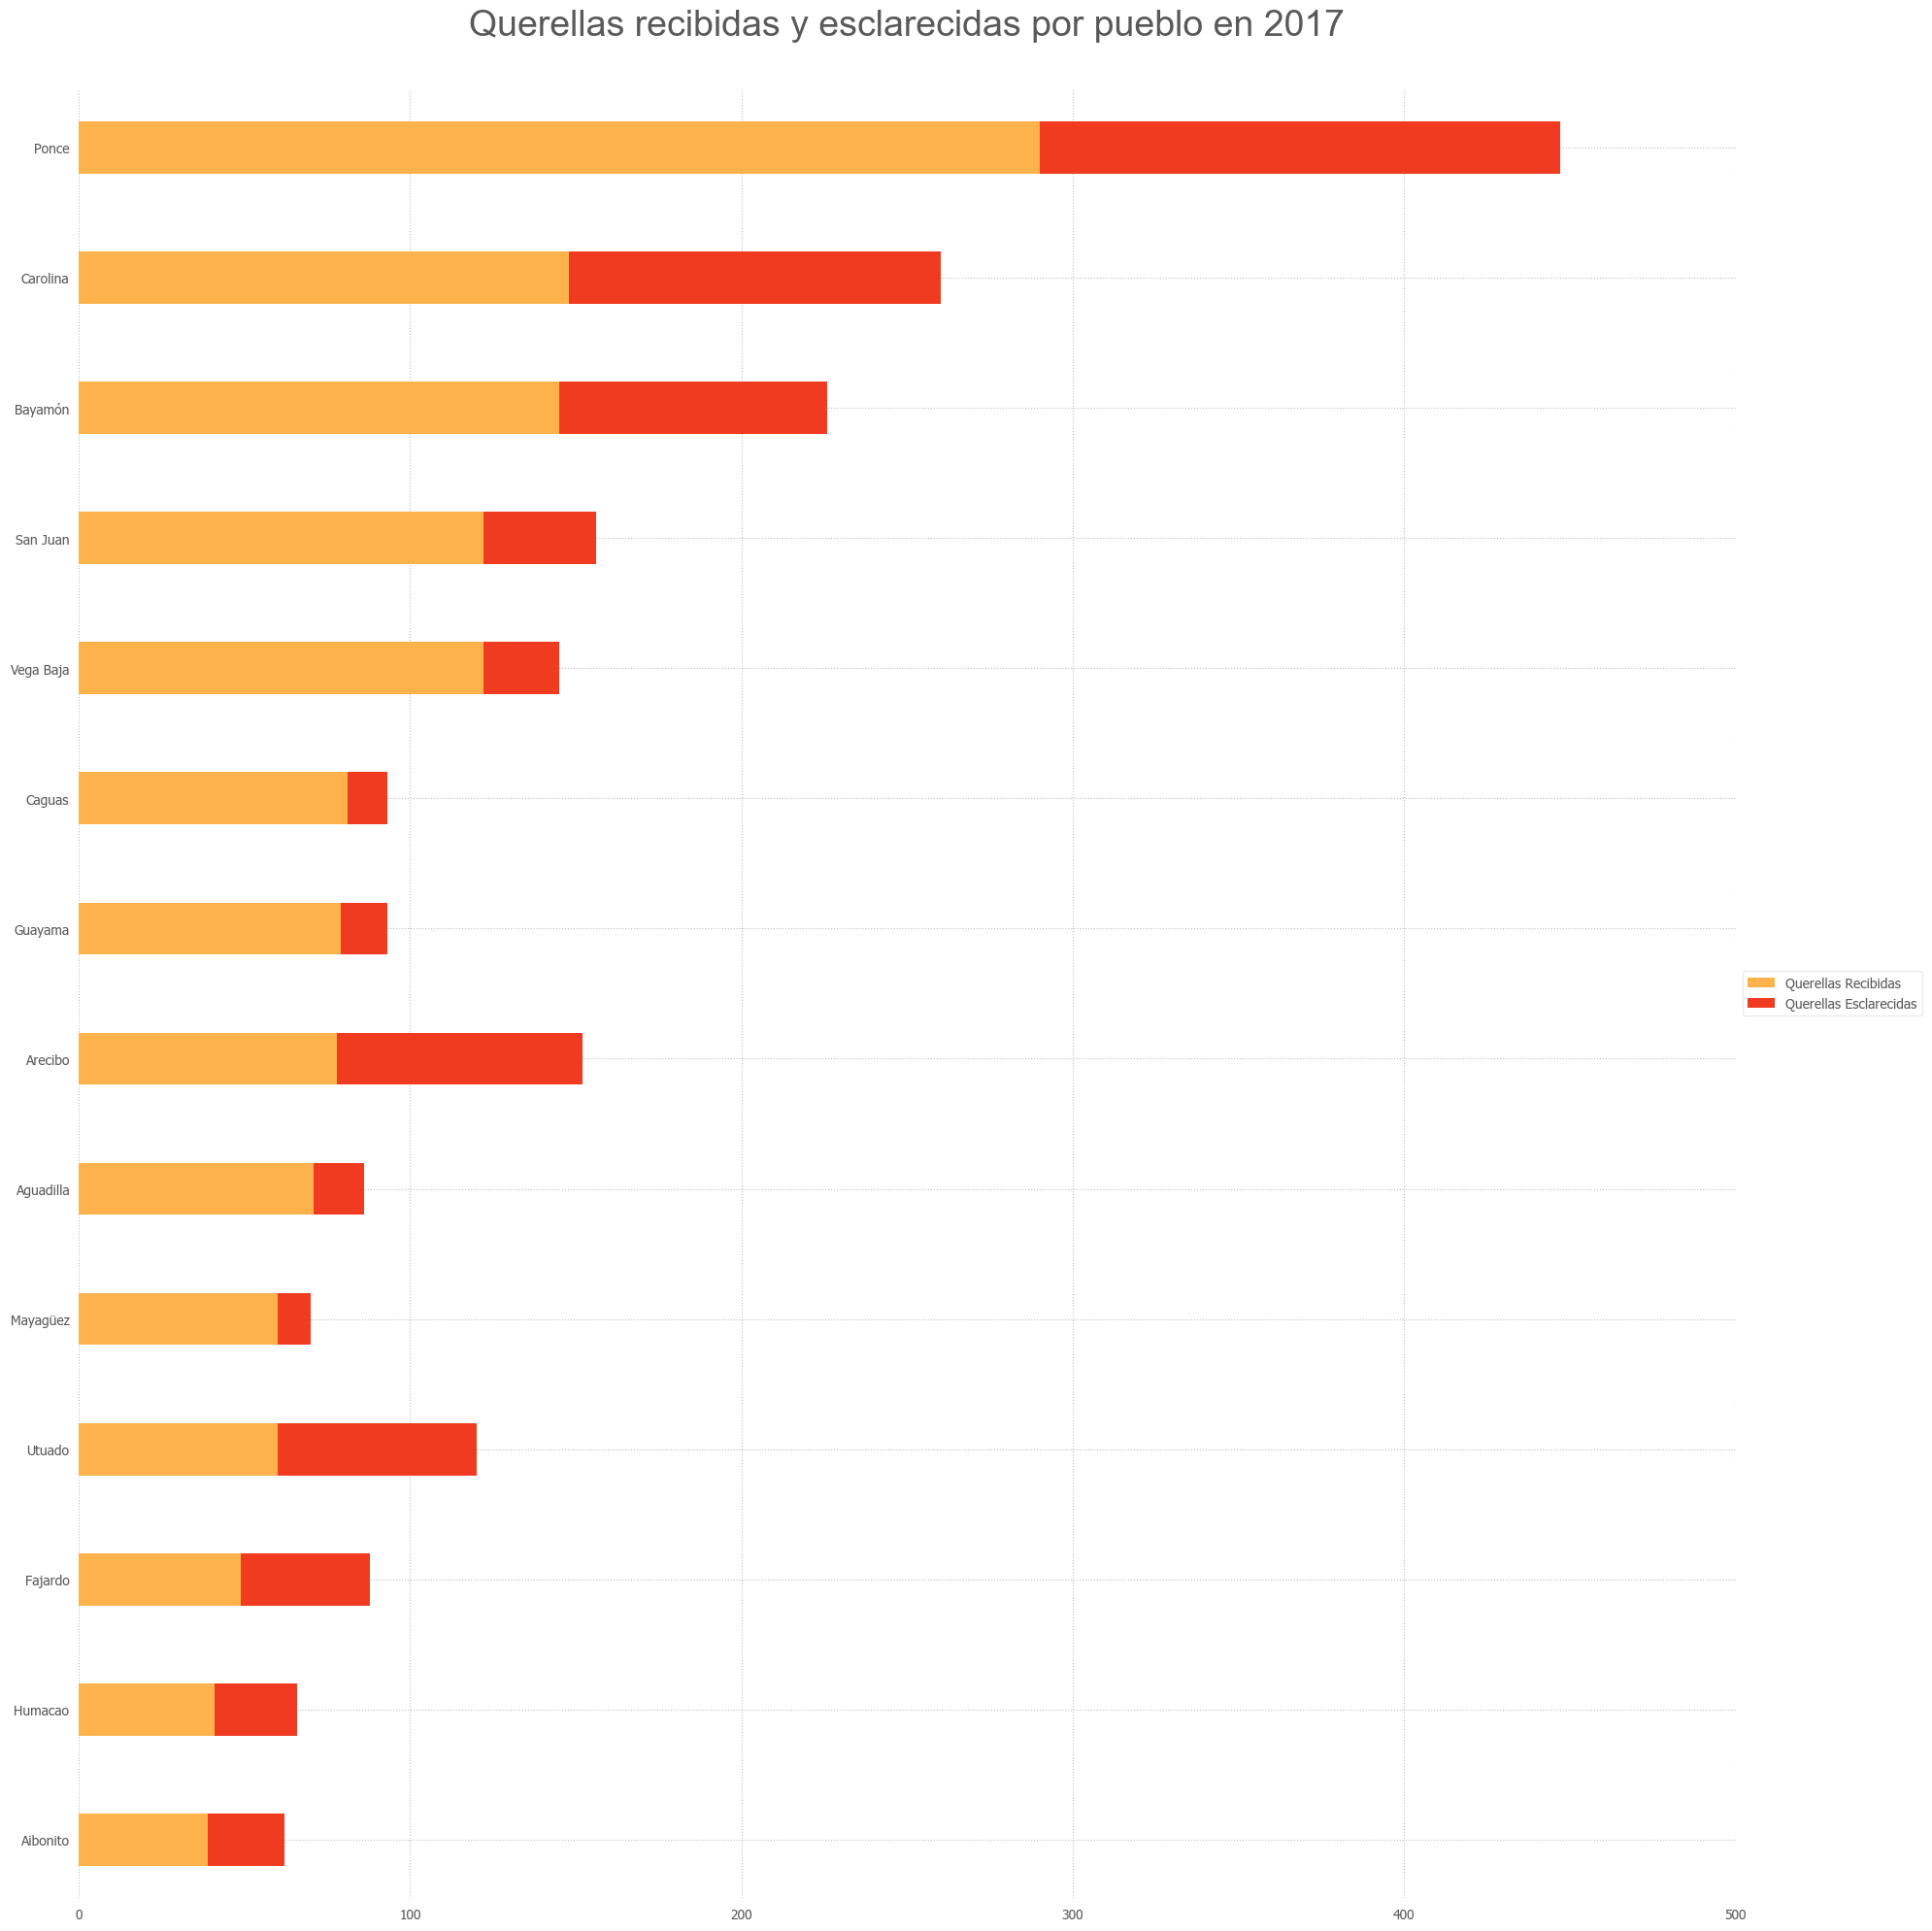

In [14]:
ax = df1.plot(kind='barh', x='Área', stacked=True, color=['#feb24c','#f03b20'], width=0.4, figsize=(20,20))
ax.set_title("Querellas recibidas y esclarecidas por pueblo en 2017",pad=40)
ax.title.set_fontsize(27)
ax.title.set_fontname('Arial')

L = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.tick_params(which='major',left=False, bottom=False,grid_alpha=1.0)
ax.set_facecolor('white')


ax.grid(True, axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0,500)
ax.yaxis.label.set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Querellas_recibidas_y_esclarecidas_por_pueblo_en_2017.pdf', transparent=True)
plt.show()

In [15]:
df= df.rename(columns={'Víctima Hombres': 'victimas_hombres', 'Víctimas Mujeres': 'victimas_mujeres'})

In [17]:
df1 = df[['Área','victimas_mujeres','victimas_hombres']][0:14].sort_values(by='victimas_mujeres',ascending=False)[0:14]
df1

,Área,victimas_mujeres,victimas_hombres
2,Ponce,175,120
6,Bayamón,118,27
0,San Juan,115,7
7,Carolina,107,41
13,Vega Baja,97,25
8,Guayama,65,14
1,Arecibo,64,14
5,Caguas,63,18
9,Aguadilla,63,8
4,Mayagüez,52,10


In [23]:
import numpy as np

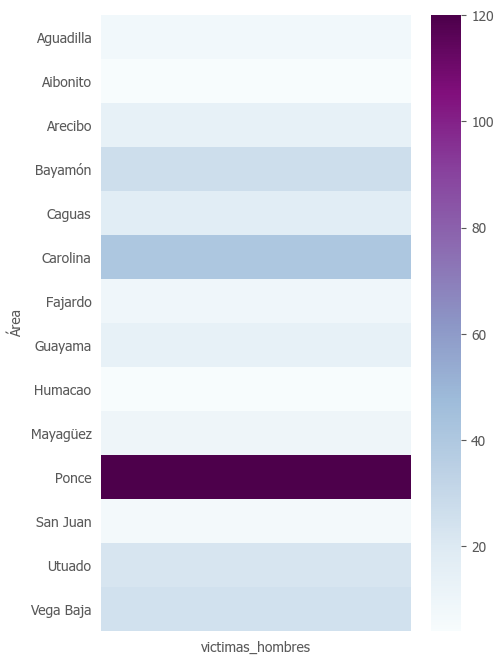

In [27]:
gendergraph= df1.pivot_table(index="Área",values="victimas_hombres", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'BuPu'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(gendergraph, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Male_victims.pdf', transparent=True)
plt.show()

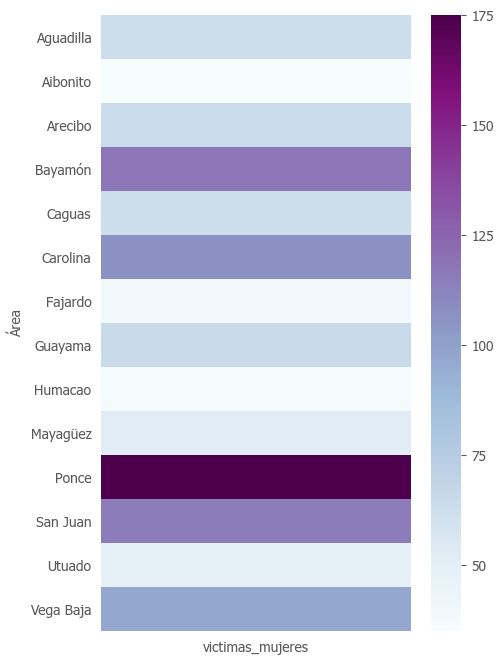

In [28]:
gendergraph= df1.pivot_table(index="Área",values="victimas_mujeres", aggfunc="mean").fillna(0)
plt.figure(figsize=(5, 8))
cmaps = 'BuPu'
#gradient = np.linspace(0, 1, 256)
#gradient = np.vstack((gradient, gradient))
sns.heatmap(gendergraph, annot=None, cmap=cmaps)
#plt.tight_layout()
plt.savefig('Female_victims.pdf', transparent=True)
plt.show()

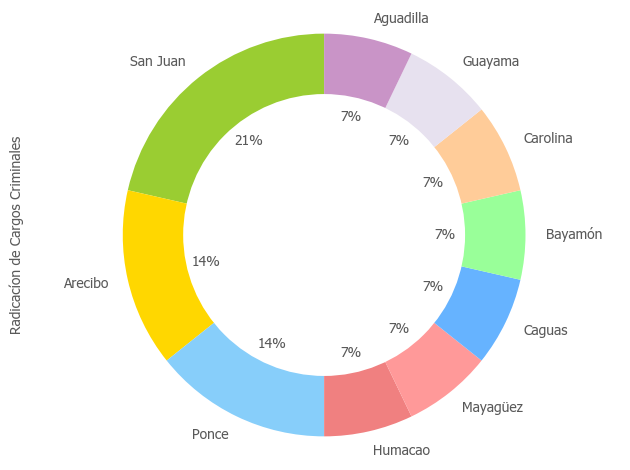

In [70]:
crimes= df.sort_values(by='Área',ascending=False)
labels = df['Área']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', '#ff9999','#66b3ff','#99ff99','#ffcc99', '#e7e1ef',
'#c994c7',
'#dd1c77']
ax = crimes['Radicacíon de Cargos Criminales'].value_counts().head(10).plot(kind='pie', labels=labels, autopct='%1.0f%%',
                                                                            colors=colors, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.show()
plt.savefig('Radicacíon de cargos criminales por pueblo.pdf')

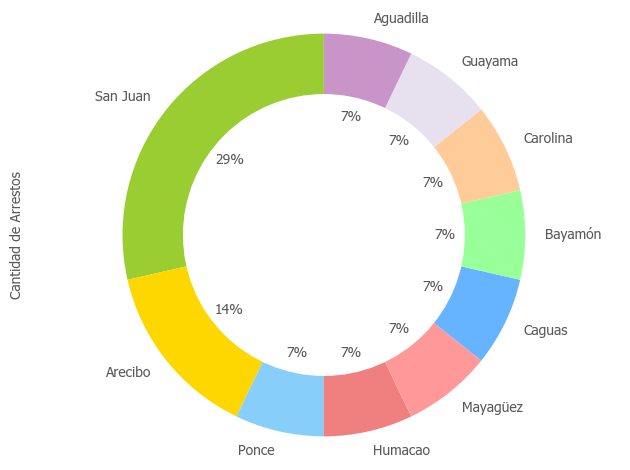

In [71]:
crimes= df.sort_values(by='Área',ascending=False)
labels = df['Área']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', '#ff9999','#66b3ff','#99ff99','#ffcc99', '#e7e1ef',
'#c994c7',
'#dd1c77']
ax = crimes['Cantidad de Arrestos'].value_counts().head(10).plot(kind='pie', labels=labels, autopct='%1.0f%%',
                                                                            colors=colors, startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.show()
plt.savefig('Cantidad de arrestos por pueblo.pdf')